In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading CSV file.
df = pd.read_csv('realtor-data.zip.csv')
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
110096,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,1200.0,16-08-2021,399000.0
110097,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,13-08-2021,359000.0
110098,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
110099,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0


In [3]:
#Dropping the unwanted columns.
df.drop(columns = ['status', 'acre_lot', 'zip_code', 'prev_sold_date', 'city'], inplace= True)

In [4]:
df

,bed,bath,state,house_size,price
0,3.0,2.0,Puerto Rico,920.0,105000.0
1,4.0,2.0,Puerto Rico,1527.0,80000.0
2,2.0,1.0,Puerto Rico,748.0,67000.0
3,4.0,2.0,Puerto Rico,1800.0,145000.0
4,6.0,2.0,Puerto Rico,NaN,65000.0
...,...,...,...,...,...
110096,2.0,2.0,New York,1200.0,399000.0
110097,2.0,2.0,New York,NaN,359000.0
110098,2.0,2.0,New York,1200.0,299000.0
110099,NaN,1.0,New York,NaN,120000.0


In [5]:
#To Find the Null or missing values in each Column.
df.isnull().sum()

bed           16770
bath          15586
state             0
house_size    35311
price            18
dtype: int64

In [6]:
#To Find the Null or missing values in each Column in Percentage.
(df.isnull().sum()*100)/df.shape[0]

bed           15.231469
bath          14.156093
state          0.000000
house_size    32.071462
price          0.016349
dtype: float64

In [7]:
#This drops the rows with null values.
df.dropna(inplace=True)

In [8]:
#This Shows the null value present in the each columns.
df.isnull().sum()

bed           0
bath          0
state         0
house_size    0
price         0
dtype: int64

In [9]:
#Noarmalization...
b = (df['price'] - df['price'].min())/(df['price'].max()- df['price'].min())
b

0         0.000119
1         0.000091
2         0.000076
3         0.000165
5         0.000204
            ...   
110092    0.000257
110094    0.000251
110095    0.000302
110096    0.000455
110098    0.000341
Name: price, Length: 71644, dtype: float64

In [10]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New York', 'New Hampshire', 'Vermont',
       'Rhode Island', 'Wyoming', 'Maine', 'Georgia', 'Pennsylvania',
       'West Virginia', 'Delaware'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
#Making LableEncoder instance.
encode = LabelEncoder()

In [13]:
# Converting categorical data into numerical format like labelEncoding.
df['state'] = encode.fit_transform(df['state'])
df

,bed,bath,state,house_size,price
0,3.0,2.0,9,920.0,105000.0
1,4.0,2.0,9,1527.0,80000.0
2,2.0,1.0,9,748.0,67000.0
3,4.0,2.0,9,1800.0,145000.0
5,4.0,3.0,9,2520.0,179000.0
...,...,...,...,...,...
110092,1.0,1.0,7,800.0,225000.0
110094,1.0,1.0,7,900.0,219900.0
110095,1.0,1.0,7,720.0,265000.0
110096,2.0,2.0,7,1200.0,399000.0


In [14]:
features = df.drop('price', axis = 1)
target = df['price']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Training and Testing the sets.
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_test,y_test)

0.015004536255146904

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
#Predicting  on Training and Testing .
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [22]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')


In [23]:
train_accuracy

0.6699467853092559

In [24]:
train_precision

np.float64(0.7053206259451292)

In [25]:
train_recall

np.float64(0.6699467853092559)

In [26]:
train_f1

np.float64(0.6728727162387844)

In [27]:
# Testing set performance
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

In [28]:
test_accuracy

0.015004536255146904

In [29]:
test_precision

np.float64(0.016308850090488606)

In [30]:
test_recall 

np.float64(0.015004536255146904)

In [32]:
test_f1

np.float64(0.014798751706601153)

In [33]:
#Predicting The Price of House by passing the details...
model.predict([[1,2,4, 800]])

C:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([940000.])

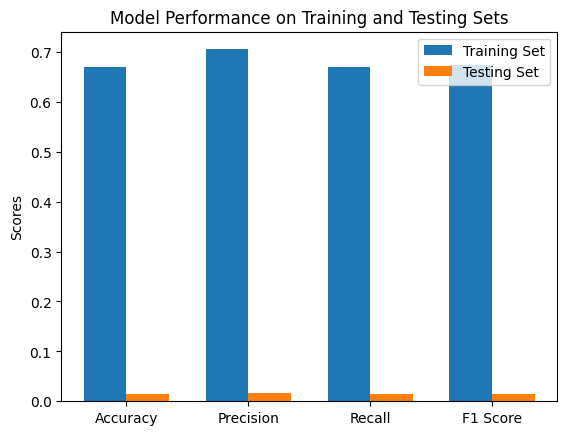

In [34]:
#Visualizating Model Perforamnce...
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

x = np.arange(len(metrics))
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Training Set')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing Set')


ax.set_ylabel('Scores')
ax.set_title('Model Performance on Training and Testing Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


plt.show()

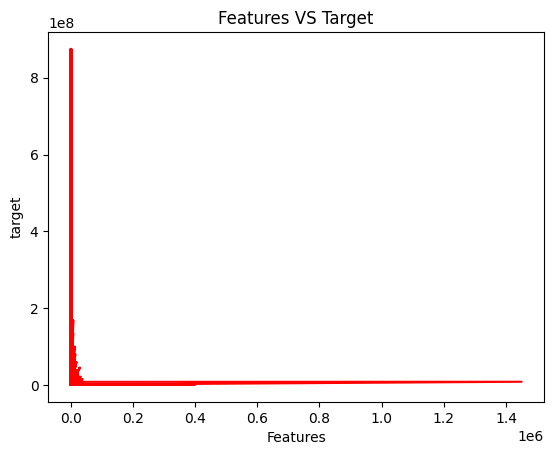

In [35]:
plt.plot(features,target,'r')   #r is red color
plt.xlabel('Features')
plt.ylabel('target')
plt.title('Features VS Target')
plt.show()

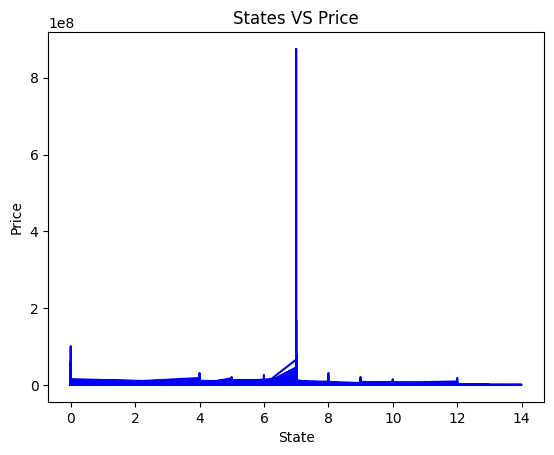

In [36]:
plt.plot(df['state'],df['price'],'b')  
plt.xlabel('State')
plt.ylabel('Price')
plt.title('States VS Price')
plt.show()